<a href="https://colab.research.google.com/github/coughlinjennie/data71200/blob/main/projects/DATA71200_Project2_Coughlin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Supervised Learning
Because the field I want to use for labels is categorical — the property type — I'm using classifier models for this portion of the project. SVM, Gaussian naive Bayes, decision tree and KNN are the ones I'm considering.  


In [1]:
#Import the libraries and install scikit-learn
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import requests
import io

!pip install -U scikit-learn==1.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 27.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


#Step 1: Import, split and clean the data
This is brought over from Project 1, with a fix to stratify when I split the data and a data pipeline for cleaning the data now that I know what needs to be done.

In [2]:
#Import the data, sourced from Kaggle and stored in my GitHub
url = "https://raw.githubusercontent.com/coughlinjennie/data71200/main/projects/nyhousing.csv" # Make sure the url is the raw version of the file on GitHub
download = requests.get(url).content
#Load the data

housing_master = pd.read_csv(io.StringIO(download.decode('utf-8')))

In [14]:
housing_master["TYPE"].value_counts()

TYPE
Co-op for sale                1450
House for sale                1012
Condo for sale                 891
Multi-family home for sale     727
Townhouse for sale             299
Pending                        243
Contingent                      88
Land for sale                   49
For sale                        20
Foreclosure                     14
Condop for sale                  5
Coming Soon                      2
Mobile house for sale            1
Name: count, dtype: int64

I need to stratify the data when I split it, and the two values in this field that will interfere with that are ones I was going to drop anyway because they're not relevant for this model. (The TYPE field is showing the status of the property, but I'm using only the labels that indicate the property type and exclude the others, plus a couple that aren't super-relevant in New York.) We're not supposed to clean data until after we split it, but I can't figure out how to stratify the data for the split without doing this one step, so I'm going to do it anyway.

In [21]:
# Delete all rows where column 'TYPE' has certain values
indexType = housing_master[ (housing_master['TYPE'] == "For sale") | (housing_master['TYPE'] == "Contingent") | (housing_master['TYPE'] == "Land for sale") | (housing_master['TYPE'] == "Foreclosure") | (housing_master['TYPE'] == "Pending") | (housing_master['TYPE'] == "Coming Soon") | (housing_master['TYPE'] == "Mobile house for sale") ].index
housing_master.drop(indexType , inplace=True)

In [22]:
housing_master["TYPE"].value_counts()

TYPE
Co-op for sale                1450
House for sale                1012
Condo for sale                 891
Multi-family home for sale     727
Townhouse for sale             299
Condop for sale                  5
Name: count, dtype: int64

In [23]:
#Set the labels on TYPE

housing_label = housing_master["TYPE"]

#Set the data
housing = housing_master.drop("TYPE", axis=1)
print(housing)

                                            BROKERTITLE      PRICE  BEDS  \
0           Brokered by Douglas Elliman  -111 Fifth Ave     315000     2   
1                                   Brokered by Serhant  195000000     7   
2                                Brokered by Sowae Corp     260000     4   
3                                   Brokered by COMPASS      69000     3   
4     Brokered by Sotheby's International Realty - E...   55000000     7   
...                                                 ...        ...   ...   
4796                                Brokered by COMPASS     599000     1   
4797                    Brokered by Mjr Real Estate Llc     245000     1   
4798      Brokered by Douglas Elliman - 575 Madison Ave    1275000     1   
4799            Brokered by E Realty International Corp     598125     2   
4800                 Brokered by Nyc Realty Brokers Llc     349000     1   

           BATH  PROPERTYSQFT  \
0      2.000000   1400.000000   
1     10.000000  1754

In [24]:
#Divide the data into training and testing sets
from sklearn.model_selection import train_test_split

housing_train, housing_test, housing_label_train, housing_label_test = train_test_split(housing, housing_label, test_size=0.3, stratify=housing_label, random_state=42)


In [25]:
#Create a column with the ZIP code of the property
housing["ZIP"] = housing.MAIN_ADDRESS.str[-5:]

In [26]:
# Create a list of redundant column names to drop
to_drop = ["LONGITUDE", "LATITUDE", "ADDRESS", "ADMINISTRATIVE_AREA_LEVEL_2", "LOCALITY", "SUBLOCALITY", "FORMATTED_ADDRESS", "MAIN_ADDRESS"]

# Drop those columns from the dataset
housing_subset = housing.drop(to_drop, axis = 1)


In [27]:
#Drop all properties values that sold for more than $1B

housing_clean = housing_subset[housing_subset['PRICE'] <= 100000000]

In [28]:
housing_clean.head()

,BROKERTITLE,PRICE,BEDS,BATH,PROPERTYSQFT,STATE,STREET_NAME,LONG_NAME,ZIP
0,Brokered by Douglas Elliman -111 Fifth Ave,315000,2,2.000000,1400.0,"New York, NY 10022",East 55th Street,Regis Residence,10022
2,Brokered by Sowae Corp,260000,4,2.000000,2015.0,"Staten Island, NY 10312",Staten Island,Sinclair Avenue,10312
3,Brokered by COMPASS,69000,3,1.000000,445.0,"Manhattan, NY 10022",New York,East 55th Street,10022
4,Brokered by Sotheby's International Realty - E...,55000000,7,2.373861,14175.0,"New York, NY 10065",New York,East 64th Street,10065
5,Brokered by Sowae Corp,690000,5,2.000000,4004.0,"Brooklyn, NY 11238",Brooklyn,Park Place,11238


In [ ]:
#Organize columns by dtype

num_housing = housing_clean["PRICE", "BEDS", "BATH", "PROPERTYSQFT"]
cat_housing = housing_clean["BROKERTITLE", "STATE","STREET_NAME","LONG_NAME", "ZIP"]

In [ ]:
#Import pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

num_imputer = SimpleImputer(strategy="median")
cat_imputer = SimpleImputer(strategy = "most_frequent")

#Fit the imputer
imputer.fit(num_housing)

#Set up numeric and categorical pipelines
num_pipeline =

(array([ 770.,  923., 1281.,  519.,  675.,  137.,   58.,    9.,    6.,
           5.]),
 array([0.        , 0.3912023 , 0.7824046 , 1.1736069 , 1.5648092 ,
        1.9560115 , 2.3472138 , 2.7384161 , 3.1296184 , 3.5208207 ,
        3.91202301]),
 <BarContainer object of 10 artists>)

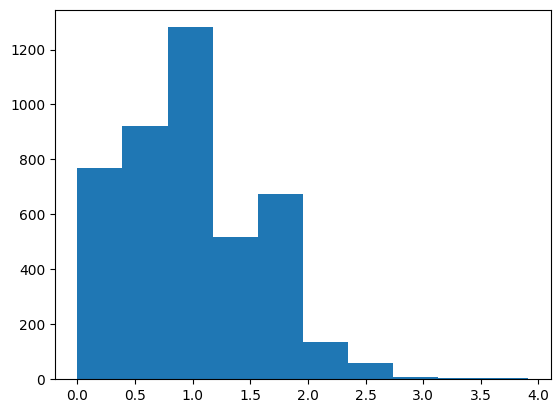

In [ ]:
#Transform the data with log and plot
plt.hist(np.log(housing_clean["BEDS"]), bins=nbins)

#Step 5: Visualizations
Next, I'm visualizing my data

#Step 6: Transformations
I'm applying four transformations to my data: squaring, cubing, logarithmic and exponential

In [ ]:
nbins = 10

from sklearn.preprocessing import KBinsDiscretizer
kb = KBinsDiscretizer(n_bins=nbins, strategy='uniform')

I'll probably want to use this transformation for the bedrooms and bathrooms.  